In [1]:
import os
import yaml

# Dataset YAML dosyasını oluşturma
dataset_yaml_path = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/dataset.yaml"
yaml_dir = os.path.dirname(dataset_yaml_path)

# Dizini kontrol et ve gerekirse oluştur
os.makedirs(yaml_dir, exist_ok=True)

# YAML içeriği
yaml_content = {
    "path": "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/Augmented_Data",
    "train": "train/images",
    "val": "valid/images",
    "test": "test/images",
    "nc": 6,
    "names": ['Healthy Teeth', 'Caries', 'Impacted Teeth', 'BDC/BDR', 'Infection', 'Fractured Teeth']
}

# YAML dosyasını kaydet
with open(dataset_yaml_path, "w") as yaml_file:
    yaml.dump(yaml_content, yaml_file)

print(f"Dataset YAML dosyası oluşturuldu: {dataset_yaml_path}")


Dataset YAML dosyası oluşturuldu: C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/dataset.yaml


In [2]:
import cv2

# CLAHE İşleme
def apply_clahe(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for img_file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_file)
        output_path = os.path.join(output_dir, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced_img = clahe.apply(img)
        cv2.imwrite(output_path, enhanced_img)

# Uygulama
input_dir = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/Augmented_Data/train/images"
clahe_dir = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/Augmented_Data/train/images_clahe"
print("CLAHE uygulanıyor...")
apply_clahe(input_dir, clahe_dir)


CLAHE uygulanıyor...


In [3]:
from albumentations import Compose, HorizontalFlip, ShiftScaleRotate, Affine

# Augmentasyon
def augment_image(image_path, save_path):
    image = cv2.imread(image_path)
    transform = Compose([
        HorizontalFlip(p=0.5),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=15, p=0.7),
        Affine(shear=15, p=0.5),
    ])
    augmented = transform(image=image)
    cv2.imwrite(save_path, augmented["image"])

# Uygulama
augmented_dir = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/Augmented_Data/train/images_augmented"
print("Augmentasyon uygulanıyor...")
os.makedirs(augmented_dir, exist_ok=True)
for img_file in os.listdir(clahe_dir):
    augment_image(os.path.join(clahe_dir, img_file), os.path.join(augmented_dir, img_file))


C:\Users\Kullanıcı\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Augmentasyon uygulanıyor...


In [4]:
from ultralytics import YOLO

# Model Eğitme
def train_model():
    model = YOLO('yolov8n.pt')
    model.train(
        data=dataset_yaml_path,
        epochs=100,
        batch=16,
        imgsz=640,
        name='dental_detection',
        plots=True,
        project='C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3'
    )

# Eğitim Başlatma
print("Eğitim başlatılıyor...")
train_model()


Eğitim başlatılıyor...



00%|██████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:24<00:00, 262kB/s]

New https://pypi.org/project/ultralytics/8.3.49 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.48  Python-3.12.6 torch-2.5.1+cu118 CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/Kullanc/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=C:/Users/Kullanc/Desktop/dentalyze_jupyter3, name=dental_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fal


train: Scanning C:\Users\Kullanıcı\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\train\labels... 55

train: New cache created: C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\Kullanıcı\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\valid\labels... 23 i

val: New cache created: C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\valid\labels.cache


Plotting labels to C:\Users\Kullanc\Desktop\dentalyze_jupyter3\dental_detection\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\Kullanc\Desktop\dentalyze_jupyter3\dental_detection
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<0

                   all         23        115    0.00701      0.139     0.0275     0.0074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.616      0.123      0.119     0.0602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.636      0.211      0.135     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.635      0.228      0.149     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.495      0.183      0.174     0.0891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.555      0.328      0.299      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.573      0.266      0.232      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.603      0.243       0.27      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.621      0.302      0.296      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.624       0.35      0.333      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.661      0.359      0.343      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.569      0.378      0.332      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.645      0.422      0.354      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.675      0.299      0.325      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115       0.52      0.402      0.357      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.342      0.361      0.348      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.658      0.341      0.374      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.438      0.518      0.375      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.674      0.468      0.415      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.726      0.388        0.4      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.523      0.453      0.422      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.518      0.421      0.397       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.353       0.44      0.402      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.477      0.441      0.366      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.566      0.416      0.428      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.465      0.497      0.413      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.595      0.383      0.459      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.652       0.55       0.51      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.738      0.518      0.507      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.613      0.452      0.498      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.615      0.507      0.449      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.528      0.478      0.431      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.534      0.521      0.519      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.439      0.679      0.554      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.516      0.623      0.539      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.473      0.657      0.532      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.646      0.564      0.503      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.732      0.476      0.558       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.416      0.605      0.532      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.505      0.557      0.569       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.722      0.555      0.551      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.706      0.524      0.523      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115       0.51      0.537      0.538      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.472      0.582      0.569      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115       0.58      0.623      0.625       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.764      0.639      0.669      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.499      0.695      0.604      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.664      0.625      0.631      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115        0.5       0.62      0.592      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.545      0.766      0.643      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.745      0.544      0.651      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.701       0.61      0.694      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.693       0.64       0.67      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.694       0.53      0.655      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.783      0.556      0.658      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.712      0.601      0.664      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.654       0.57      0.649      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.705      0.648      0.752      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.675      0.621      0.696      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.562      0.685      0.675      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.685      0.591      0.653      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.723      0.782      0.785      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115       0.71      0.694      0.707      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.735      0.652      0.706      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115       0.64      0.796      0.784      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.757      0.606      0.736      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.742      0.653       0.73      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.738       0.69      0.756      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.744      0.624      0.765      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.766      0.702      0.776      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.639      0.741       0.79      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.665      0.789      0.788      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.776      0.625       0.78       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.709      0.705      0.776       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.707      0.775      0.796      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.761      0.697      0.777      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.689      0.739      0.768      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115       0.79      0.687      0.775      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.745      0.745      0.763      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.788      0.748      0.785      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.732      0.687       0.76      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.763      0.737      0.786      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.726      0.767      0.781       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115       0.72      0.777      0.797      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.804      0.701      0.799      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.789      0.732      0.802      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.701       0.77      0.773      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.789      0.642      0.762      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.718      0.813      0.793      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.799      0.736      0.808      0.517


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.829      0.699      0.785      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.793       0.71      0.753      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.794      0.699      0.751      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.786      0.733      0.807      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.786      0.731      0.805      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.795      0.708      0.809      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.824      0.685      0.817      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.744      0.751      0.809      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.752      0.742      0.812      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         23        115      0.817      0.692       0.81      0.491



100 epochs completed in 10.338 hours.
Optimizer stripped from C:\Users\Kullanc\Desktop\dentalyze_jupyter3\dental_detection\weights\last.pt, 6.3MB
Optimizer stripped from C:\Users\Kullanc\Desktop\dentalyze_jupyter3\dental_detection\weights\best.pt, 6.3MB

Validating C:\Users\Kullanc\Desktop\dentalyze_jupyter3\dental_detection\weights\best.pt...
Ultralytics 8.3.48  Python-3.12.6 torch-2.5.1+cu118 CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs



                Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all         23        115      0.803      0.702      0.799      0.517
         Healthy Teeth          8         14      0.576      0.643      0.716      0.545
                Caries          3          4      0.639       0.25      0.457      0.241
        Impacted Teeth          7         18      0.947      0.984      0.992      0.637
               BDC/BDR          3          3          1      0.826      0.995      0.623
             Infection          6          9          1      0.998      0.995      0.615
       Fractured Teeth         22         67      0.658      0.507       0.64      0.439
Speed: 2.9ms preprocess, 108.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to C:\Users\Kullanc\Desktop\dentalyze_jupyter3\dental_detection


In [8]:
from ultralytics import YOLO
import os
import yaml
# Tahmin
def predict_images():
    # Doğru model yolunu kontrol edin
    model_path = 'C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/dental_detection/weights/best.pt'
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model dosyası bulunamadı: {model_path}")
    
    model = YOLO(model_path)
    results = model.predict(
        source='C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/Augmented_Data/test/images',
        conf=0.25,
        save=True,
        save_txt=True,
        save_conf=True
    )
    return results

# Tahmin Başlatma
print("Tahmin başlatılıyor...")
results = predict_images()
print("Tahmin tamamlandı.")


Tahmin başlatılıyor...

image 1/23 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\test\images\104_jpg.rf.05501644f89b63b3f9ba38f2c2436c75.jpg: 352x640 1 Healthy Teeth, 1 Impacted Teeth, 237.8ms
image 2/23 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\test\images\106_jpg.rf.55f75c16fffc0fea03b260bf91b8fc68.jpg: 352x640 2 Infections, 2 Fractured Teeths, 195.6ms
image 3/23 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\test\images\127_jpg.rf.c6c7a6eea86965354399e338b71fbc6a.jpg: 288x640 2 Healthy Teeths, 1 Impacted Teeth, 4 Fractured Teeths, 175.6ms
image 4/23 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\test\images\143_jpg.rf.d7f7764bed646dc8d58806a732ef86f4.jpg: 352x640 1 Healthy Teeth, 1 Impacted Teeth, 1 Fractured Teeth, 192.2ms
image 5/23 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\test\images\146_jpg


image 1/1 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Original_Data\1.jpg: 352x640 3 Healthy Teeths, 1 Caries, 3 Fractured Teeths, 246.5ms
Speed: 15.8ms preprocess, 246.5ms inference, 0.0ms postprocess per image at shape (1, 3, 352, 640)
Results saved to C:\Users\Kullanc\Desktop\dentalyze_jupyter3\results\manual_test


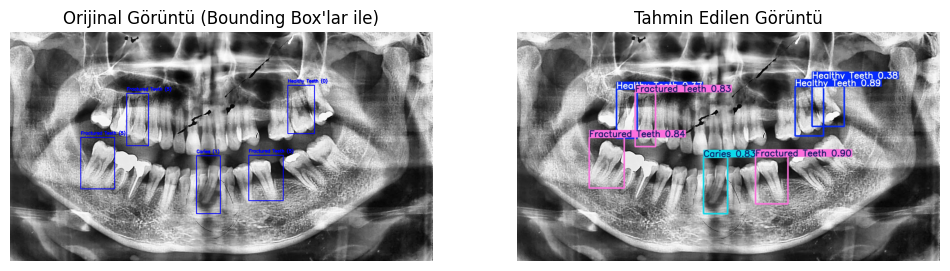

In [9]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# Sınıf isimleri
class_names = ['Healthy Teeth', 'Caries', 'Impacted Teeth', 'BDC/BDR', 'Infection', 'Fractured Teeth']

# Modeli yükle
model = YOLO('C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/dental_detection/weights/best.pt')

# Yeni bir görüntü üzerinde tahmin yap
image_path = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/Original_Data/1.jpg"
results = model.predict(
    source=image_path,
    conf=0.25,
    save=True,
    project='C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/results',
    name='manual_test'
)

# Orijinal görüntüyü yükle
original_image = cv2.imread(image_path)

# Tahmin edilen görüntüyü yükle
result_image_path = f"C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/results/manual_test/{os.path.basename(image_path)}"
predicted_image = cv2.imread(result_image_path)

# Orijinal bounding box bilgilerini oku ve çiz
txt_path_original = f"C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/Original_Data/{os.path.splitext(os.path.basename(image_path))[0]}.txt"
if os.path.exists(txt_path_original):
    with open(txt_path_original, "r") as f:
        boxes_original = f.readlines()

    for box in boxes_original:
        class_id, x_center, y_center, width, height = map(float, box.split())
        x1 = int((x_center - width / 2) * original_image.shape[1])
        y1 = int((y_center - height / 2) * original_image.shape[0])
        x2 = int((x_center + width / 2) * original_image.shape[1])
        y2 = int((y_center + height / 2) * original_image.shape[0])

        # Çerçeve çiz
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(original_image, f"{class_names[int(class_id)]} ({int(class_id)})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Tahmin bounding box bilgilerini oku ve tahmin edilen görüntü üzerine çiz
txt_path_predicted = f"C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/results/manual_test/{os.path.splitext(os.path.basename(image_path))[0]}.txt"
if os.path.exists(txt_path_predicted):
    with open(txt_path_predicted, "r") as f:
        boxes_predicted = f.readlines()

    for box in boxes_predicted:
        class_id, x_center, y_center, width, height = map(float, box.split())
        x1 = int((x_center - width / 2) * predicted_image.shape[1])
        y1 = int((y_center - height / 2) * predicted_image.shape[0])
        x2 = int((x_center + width / 2) * predicted_image.shape[1])
        y2 = int((y_center + height / 2) * predicted_image.shape[0])

        # Çerçeve çiz
        cv2.rectangle(predicted_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(predicted_image, f"{class_names[int(class_id)]} ({int(class_id)})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Görselleştirme
plt.figure(figsize=(12, 6))

# Orijinal görüntü
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Orijinal Görüntü (Bounding Box'lar ile)")
plt.axis("off")

# Tahmin edilen görüntü
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.title("Tahmin Edilen Görüntü")
plt.axis("off")

plt.show()

In [12]:
from ultralytics import YOLO
import os

# Modeli yükle
model_path = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/dental_detection/weights/best.pt"
model = YOLO(model_path)

# Tahmin ve bounding box'ları kaydet
def predict_and_save_txt(source_dir, output_dir):
    # Tahmin sonuçlarını kaydedecek klasörü oluştur
    os.makedirs(output_dir, exist_ok=True)
    
    # Tahmin yap
    results = model.predict(
        source=source_dir,
        conf=0.25,          # Güven eşiği
        save=True,          # Bounding box'lı görselleri kaydet
        save_txt=True,      # YOLO formatında txt dosyalarını kaydet
        project=output_dir, # Tahmin çıktılarının kaydedileceği ana dizin
        name="predictions"  # Özel klasör adı
    )
    
    print(f"Tahminler ve TXT dosyaları kaydedildi: {output_dir}/predictions")

# Kaynak dizin (test görüntüleri) ve çıktı dizini
source_dir = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/Augmented_Data/test/images"
output_dir = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/runs/predict"

# Fonksiyonu çalıştır
predict_and_save_txt(source_dir, output_dir)



image 1/23 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\test\images\104_jpg.rf.05501644f89b63b3f9ba38f2c2436c75.jpg: 352x640 1 Healthy Teeth, 1 Impacted Teeth, 137.9ms
image 2/23 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\test\images\106_jpg.rf.55f75c16fffc0fea03b260bf91b8fc68.jpg: 352x640 2 Infections, 2 Fractured Teeths, 134.9ms
image 3/23 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\test\images\127_jpg.rf.c6c7a6eea86965354399e338b71fbc6a.jpg: 288x640 2 Healthy Teeths, 1 Impacted Teeth, 4 Fractured Teeths, 160.8ms
image 4/23 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\test\images\143_jpg.rf.d7f7764bed646dc8d58806a732ef86f4.jpg: 352x640 1 Healthy Teeth, 1 Impacted Teeth, 1 Fractured Teeth, 206.6ms
image 5/23 C:\Users\Kullanc\Desktop\dentalyze_jupyter3\Dental OPG XRAY Dataset\Augmented_Data\test\images\146_jpg.rf.416fe5cb77bd045aedf

In [16]:
import os
import numpy as np

# IoU (Intersection over Union) Hesaplama Fonksiyonu
def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = box1_area + box2_area - intersection

    return intersection / union if union > 0 else 0

# YOLO Formatını [x1, y1, x2, y2] Formatına Dönüştürme
def read_boxes(label_file, image_width, image_height):
    boxes = []
    with open(label_file, "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id, x_center, y_center, width, height = map(float, parts)
            x1 = int((x_center - width / 2) * image_width)
            y1 = int((y_center - height / 2) * image_height)
            x2 = int((x_center + width / 2) * image_width)
            y2 = int((y_center + height / 2) * image_height)
            boxes.append([x1, y1, x2, y2, int(class_id)])
    return boxes

# Accuracy Hesaplama
def calculate_accuracy(gt_dir, pred_dir, img_dir, iou_threshold=0.5):
    total_gt = 0
    correct_predictions = 0

    for gt_file in os.listdir(gt_dir):
        if gt_file.endswith(".txt"):
            image_name = gt_file.replace(".txt", ".jpg")  # Görüntü adını tahmin et
            gt_path = os.path.join(gt_dir, gt_file)
            pred_path = os.path.join(pred_dir, gt_file)
            image_path = os.path.join(img_dir, image_name)

            if not os.path.exists(pred_path):
                continue  # Eğer tahmin dosyası yoksa atla
            
            # Görüntü boyutlarını al (YOLO formatına dönüştürmek için gerekli)
            image = cv2.imread(image_path)
            if image is None:
                continue
            img_height, img_width = image.shape[:2]

            # Ground truth ve tahmin bounding box'larını oku
            gt_boxes = read_boxes(gt_path, img_width, img_height)
            pred_boxes = read_boxes(pred_path, img_width, img_height)

            total_gt += len(gt_boxes)

            for gt_box in gt_boxes:
                for pred_box in pred_boxes:
                    iou = calculate_iou(gt_box[:4], pred_box[:4])
                    if iou >= iou_threshold and gt_box[4] == pred_box[4]:  # IoU ve sınıf kontrolü
                        correct_predictions += 1
                        break  # Bir ground truth kutusu için sadece bir doğru eşleşme sayılır

    # Accuracy hesapla
    accuracy = correct_predictions / total_gt if total_gt > 0 else 0
    return accuracy

# Dosya dizinleri
import cv2

gt_dir = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/Augmented_Data/test/labels"  # Gerçek etiketler
pred_dir = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/runs/predict/predictions/labels"  # Tahmin etiketleri
img_dir = "C:/Users/Kullanıcı/Desktop/dentalyze_jupyter3/Dental OPG XRAY Dataset/Augmented_Data/test/images"  # Görüntüler

# Accuracy Hesaplama
accuracy = calculate_accuracy(gt_dir, pred_dir, img_dir)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 68.63%
